In [27]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [28]:
data=pd.read_csv('/content/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [29]:
# checking dimensions
data.shape

(200, 4)

In [30]:
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [31]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
# checking for missing values
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data Visualization

Text(0.5, 1.0, 'Correlation')

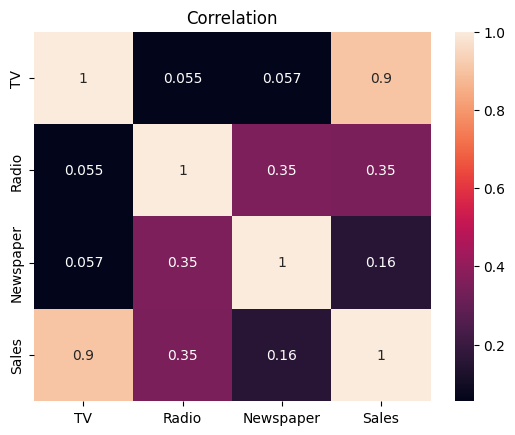

In [33]:
sns.heatmap(data.corr(),annot=True,fmt='.2g')
plt.title('Correlation')

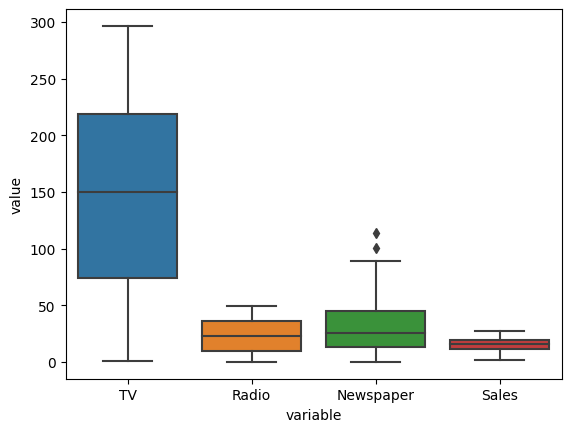

In [34]:
sns.boxplot(data.melt(value_vars=data.columns),x='variable',y='value')
plt.xlabel=('Variables')
plt.ylabel=('Values')

Train, Test and Split

In [35]:
X=data.drop('Sales',axis=1)
y=data['Sales']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=101)
print(f'''X Train: {X_train.shape}
X Test: {X_test.shape}
y Train: {y_train.shape}
y Test: {y_test.shape}''')

X Train: (160, 3)
X Test: (40, 3)
y Train: (160,)
y Test: (40,)


In [40]:
preprocess=Pipeline([
    ('scaler',StandardScaler())
])

#model
model=Pipeline([
    ('preprocess',preprocess),
    ('regressor',RandomForestRegressor())
])
model.fit(X_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [41]:
# Prediction
y_pred=model.predict(X_test)
print(f'Testing Accuracy: {round(100*r2_score(y_test,y_pred),2)}%')

Testing Accuracy: 94.22%
